In [12]:
import torch
import matplotlib.pyplot as plt

# Create a list of sets of N random numbers
N = 3
inputs = torch.randn((10000,N),dtype=torch.float32).cuda()
outputs = inputs ** 2

In [13]:
outputs.device

device(type='cuda', index=0)

In [14]:
inputs[0]

tensor([-0.2657,  1.2824,  1.1674], device='cuda:0')

In [15]:
outputs[0]

tensor([0.0706, 1.6445, 1.3629], device='cuda:0')

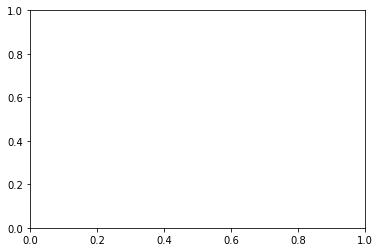

In [16]:
# set up graph for loss curve
fig_loss, ax_loss = plt.subplots()

# create a test set
test_inputs = torch.randn((1000,N),dtype=torch.float32).cuda()
test_outputs = test_inputs ** 2

In [17]:
import pprint

# Create a simple neural network
hidden_nodes = 100
model = torch.nn.Sequential(
    torch.nn.Linear(inputs.shape[1],hidden_nodes),
    torch.nn.ReLU(),
    # torch.nn.Linear(hidden_nodes,hidden_nodes),
    # torch.nn.ReLU(),
    torch.nn.Linear(hidden_nodes,outputs.shape[1])
)
model.cuda()

print('Weights and bias values before training.')
for label in model.state_dict().keys():
    x = model.state_dict()[label]
    # print('\n{}: '.format(label))
    pprint.pprint(x)

print('\nCheck the neural network output before training:')
with torch.no_grad():
    model.eval()
    test = torch.tensor([0.1, 0.2, 0.3]).cuda()
    prediction = model(test)
    # print('input: {}, output: {}'.format(test,prediction))

Weights and bias values before training.
tensor([[ 0.0273,  0.3089,  0.5132],
        [ 0.0807,  0.5353, -0.3424],
        [-0.1788,  0.3870,  0.3170],
        [ 0.2842,  0.5138, -0.1464],
        [ 0.5639, -0.1564,  0.4745],
        [ 0.2790, -0.0024,  0.3041],
        [-0.2689,  0.5014,  0.4669],
        [ 0.4474, -0.2010, -0.0390],
        [ 0.5108, -0.4572,  0.5436],
        [ 0.2380,  0.3309,  0.5012],
        [ 0.3395,  0.3739,  0.4146],
        [-0.3247, -0.4394,  0.3330],
        [ 0.2182, -0.1571,  0.3070],
        [-0.2418,  0.3742, -0.5315],
        [-0.4809,  0.3124,  0.5579],
        [ 0.1147, -0.3378,  0.1951],
        [ 0.5436, -0.1670, -0.1273],
        [-0.5446,  0.2394,  0.1286],
        [-0.4352,  0.5596,  0.3206],
        [ 0.2517, -0.0447, -0.4592],
        [-0.3264, -0.4161,  0.3232],
        [ 0.3092,  0.3549, -0.4749],
        [-0.5023, -0.5683,  0.4541],
        [-0.2588, -0.0990, -0.5109],
        [ 0.3595, -0.4053,  0.1407],
        [ 0.3282, -0.3005, -0.2351

In [18]:
import math

# Get ready to train
model.train()

# Break the list up into smaller batches for more efficient training
numMiniBatch = int(math.floor(inputs.shape[0]/100.))
inputMiniBatches = inputs.chunk(numMiniBatch)
outputMiniBatches = outputs.chunk(numMiniBatch)

# Train the neural network
lossFunc = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

n_epochs = 500
for epoch in range(n_epochs):
    # Print something every 10 epochs of training
    if epoch%10 == 0:
        print('=>Starting {}/{} epochs.'.format(epoch+1,n_epochs))
    for minibatch in range(numMiniBatch):
        prediction = model(inputMiniBatches[minibatch])
        loss = lossFunc(prediction,outputMiniBatches[minibatch])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Plot two points on the loss graph for each epoch, one for testing and one for training.
    total_prediction = model(inputs)
    total_loss = lossFunc(total_prediction, outputs).item()
    test_total_prediction = model(test_inputs)
    test_total_loss = lossFunc(test_total_prediction, test_outputs).item()
    ax_loss.plot(epoch, total_loss, 'bo', markersize=1, label='Training')
    ax_loss.plot(epoch, test_total_loss, 'go', markersize=1, label='Testing')
    ax_loss.set_xlabel('Epochs')
    ax_loss.set_ylabel('Total Loss')
# ax_loss.legend() # I didn't find an easy way to add a legend for this particular graph
    


print ('Training done!')

=>Starting 1/500 epochs.
=>Starting 11/500 epochs.
=>Starting 21/500 epochs.
=>Starting 31/500 epochs.
=>Starting 41/500 epochs.
=>Starting 51/500 epochs.
=>Starting 61/500 epochs.
=>Starting 71/500 epochs.
=>Starting 81/500 epochs.
=>Starting 91/500 epochs.
=>Starting 101/500 epochs.
=>Starting 111/500 epochs.
=>Starting 121/500 epochs.
=>Starting 131/500 epochs.
=>Starting 141/500 epochs.
=>Starting 151/500 epochs.
=>Starting 161/500 epochs.
=>Starting 171/500 epochs.
=>Starting 181/500 epochs.
=>Starting 191/500 epochs.
=>Starting 201/500 epochs.
=>Starting 211/500 epochs.
=>Starting 221/500 epochs.
=>Starting 231/500 epochs.
=>Starting 241/500 epochs.
=>Starting 251/500 epochs.
=>Starting 261/500 epochs.
=>Starting 271/500 epochs.
=>Starting 281/500 epochs.
=>Starting 291/500 epochs.
=>Starting 301/500 epochs.
=>Starting 311/500 epochs.
=>Starting 321/500 epochs.
=>Starting 331/500 epochs.
=>Starting 341/500 epochs.
=>Starting 351/500 epochs.
=>Starting 361/500 epochs.
=>Starting 3

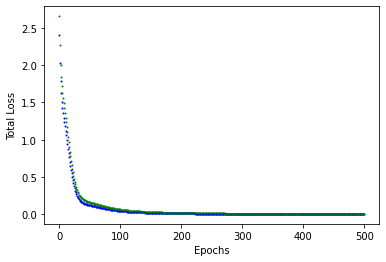

In [19]:
fig_loss

In [ ]:
# fig_loss.savefig('loss.pdf')

In [20]:
# test a single input, not very useful
with torch.no_grad():
    model.eval()
    test = torch.tensor([0.1, 0.2, 0.3]).cuda()
    prediction = model(test)
    print('input: {}, prediction: {}'.format(test,prediction))

input: tensor([0.1000, 0.2000, 0.3000], device='cuda:0'), prediction: tensor([0.0108, 0.0277, 0.0797], device='cuda:0')


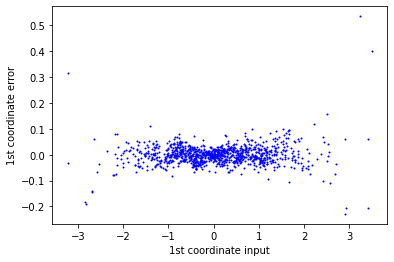

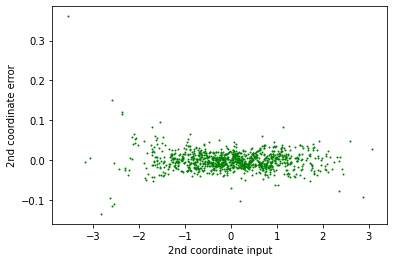

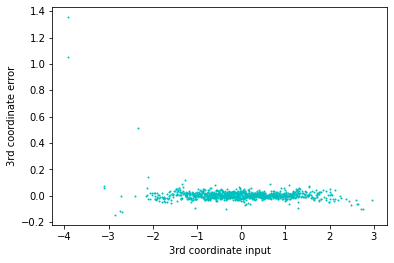

In [21]:
# Check out the output by running the model in evaluation
# make some residual plots

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()


# this can be easily modified to plot output vs. input directly
with torch.no_grad():
    model.eval()
    for input in test_inputs:
        prediction = model(input)
        actual = input ** 2
        residual = actual - prediction
        ax.plot(input[0].item(),residual[0].item(), 'bo', markersize=1)
        ax.set_xlabel('1st coordinate input')
        ax.set_ylabel('1st coordinate error')
        ax2.plot(input[1].item(),residual[1].item(), 'go', markersize=1)
        ax2.set_xlabel('2nd coordinate input')
        ax2.set_ylabel('2nd coordinate error')
        ax3.plot(input[2].item(),residual[2].item(), 'co', markersize=1)
        ax3.set_xlabel('3rd coordinate input')
        ax3.set_ylabel('3rd coordinate error')

In [ ]:
# fig.savefig('1st-1st.pdf')
# fig2.savefig('2nd-2nd.pdf')
# fig3.savefig('3rd-3rd.pdf')

In [ ]:
# NOT TESTED
# Let's look at the weights and biases
# Check the math by hand
A = model.state_dict()['0.weight'].tolist()
a = model.state_dict()['0.bias'].tolist()
print('\nWeights and biases for first layer.')
pprint.pprint(A)
print()
pprint.pprint(a)

B = model.state_dict()['2.weight'].tolist()
b = model.state_dict()['2.bias'].tolist()
print('\nWeights and biases for second layer.')
pprint.pprint(B)
print()
pprint.pprint(b)

In [ ]:
# Work out the details
x0 = test[0].item()
x1 = test[1].item()
x2 = test[2].item()

print('Input to neural network:')
print('x0={:7.4f}, x1={:7.4f},x2={:7.4f}'.format(x0,x1,x2))

# Check the math by hand
A = model.state_dict()['0.weight'].tolist()
a = model.state_dict()['0.bias'].tolist()

sum0 = A[0][0]*x0+A[0][1]*x1+A[0][2]*x2+a[0]
sum1 = A[1][0]*x0+A[1][1]*x1+A[1][2]*x2+a[1]
sum2 = A[2][0]*x0+A[2][1]*x1+A[2][2]*x2+a[2]
print('\nSums for first layer:')
print('{:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(sum0,A[0][0],x0,A[0][1],x1,A[0][2],x2,a[0]))
print('{:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(sum1,A[1][0],x0,A[1][1],x1,A[1][2],x2,a[1]))
print('{:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(sum2,A[2][0],x0,A[2][1],x1,A[2][2],x2,a[2]))

y0 = max(sum0,0)
y1 = max(sum1,0)
y2 = max(sum2,0)
print('\nApplying the ReLU to the sums:')
print('y0 = {:7.4f} = ReLU({:7.4f})'.format(y0,sum0))
print('y1 = {:7.4f} = ReLU({:7.4f})'.format(y1,sum1))
print('y2 = {:7.4f} = ReLU({:7.4f})'.format(y2,sum2))

B = model.state_dict()['2.weight'].tolist()
b = model.state_dict()['2.bias'].tolist()

z0 = B[0][0]*y0+B[0][1]*y1+B[0][2]*y2+b[0]
z1 = B[1][0]*y0+B[1][1]*y1+B[1][2]*y2+b[1]
z2 = B[2][0]*y0+B[2][1]*y1+B[2][2]*y2+b[2]
print('\nCalculating the final output:')
print('z0 = {:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(z0,B[0][0],y0,B[0][1],y1,B[0][2],y2,b[0]))
print('z1 = {:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(z1,B[1][0],y0,B[1][1],y1,B[1][2],y2,b[1]))
print('z2 = {:7.4f} = {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f} * {:7.4f} + {:7.4f}'.format(z2,B[2][0],y0,B[2][1],y1,B[2][2],y2,b[2]))